In [1]:
#Import libaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
path = r'/Users/emilypickett/Documents/InstaCart Basket Project'

In [3]:
#import dataframe from part 1.2
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'over_five_orders.csv'))

### create customer profiling 

### create age flag 

In [5]:
#create age flag
result = []

for value in df["Age"]:
  if value < 26:
    result.append("Young")
  elif value <= 65:
    result.append("Middle Age")
  else:
    result.append("Senior")

In [6]:
result

['Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',
 'Senior',

In [7]:
#adding age_flag column to dataframe
df['age_flag'] = result

In [8]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender,median_prior_order,frequency,Gender,STATE,Age,date_joined,n_dependants,family_status,income,merge_2,region,low_activity,age_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,6.6,Frequent_customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Aerage orders,32,Regular customer,6.935811,Low spender,6.6,Frequent_customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No,Senior
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,NaN,4,0,both,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,6.6,Frequent_customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No,Senior
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,1,1,both,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,6.6,Frequent_customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No,Senior
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,6.6,Frequent_customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No,Senior


In [9]:
# Creating new column for profile flag

df.loc[(df['n_dependants'] == 0), 'customer_profile'] = 'single  adult'

/var/folders/zk/lxc3sp7n5rqf4k_sl172k5xh0000gn/T/ipykernel_42784/93129103.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'single  adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['n_dependants'] == 0), 'customer_profile'] = 'single  adult'


In [10]:
df.loc[(df['n_dependants'] > 0), 'customer_profile'] = 'parent'

In [11]:
df2 = df['customer_profile'].value_counts(dropna = False)

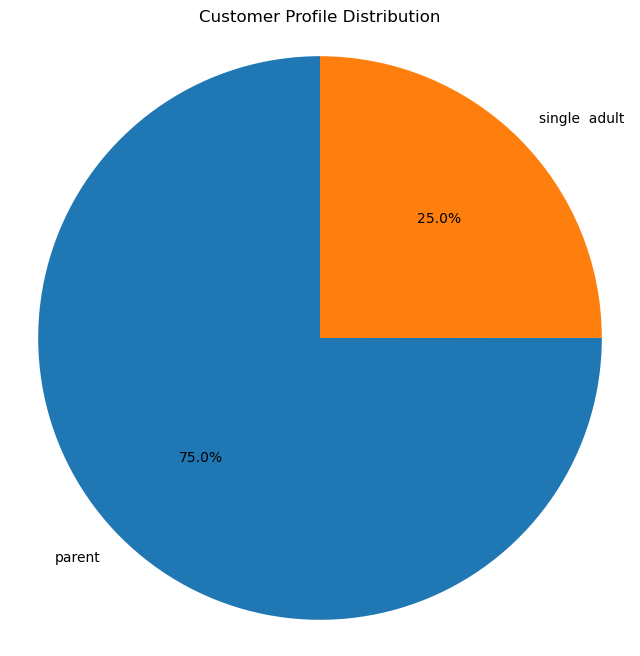

In [12]:
plt.figure(figsize=(8, 8))
df2.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Customer Profile Distribution')
plt.ylabel('')
plt.axis('equal') 
plt.show()

In [13]:
#exporting visual
plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_customer_profile.png'), bbox_inches= 'tight')

<Figure size 640x480 with 0 Axes>

### Aggreate customer- profile for usage frequency and expenditure

In [40]:
#create cross tab with customer profile and spender
df_spender = pd.crosstab(df['customer_profile'], df['spender'])

In [23]:
df_spender

spender,High spender,Low spender
customer_profile,,
parent,457250,22767500
single adult,146034,7593639


In [26]:
#create cross tab with customer profile and frequency
df_freq = pd.crosstab(df['customer_profile'], df['frequency'])

In [27]:
df_freq

frequency,Frequent_customer,Non-frequent_customer,Regular customer
customer_profile,,,
parent,22882828,32,342023
single adult,7621635,108,117938


### Compare customer profiles with region and departments

#### Customer profiles and region

In [93]:
#filter for single adult
df_single = df[df['customer_profile'] == 'single  adult']

In [101]:
#create crosstab for single adult and region
df_single_region = pd.crosstab(df_single['customer_profile'], df_single['region'])

In [102]:
print(df_single_region)

region            Midwest  Northeast    South     West
customer_profile                                      
single  adult     1822816    1354482  2581933  1980450


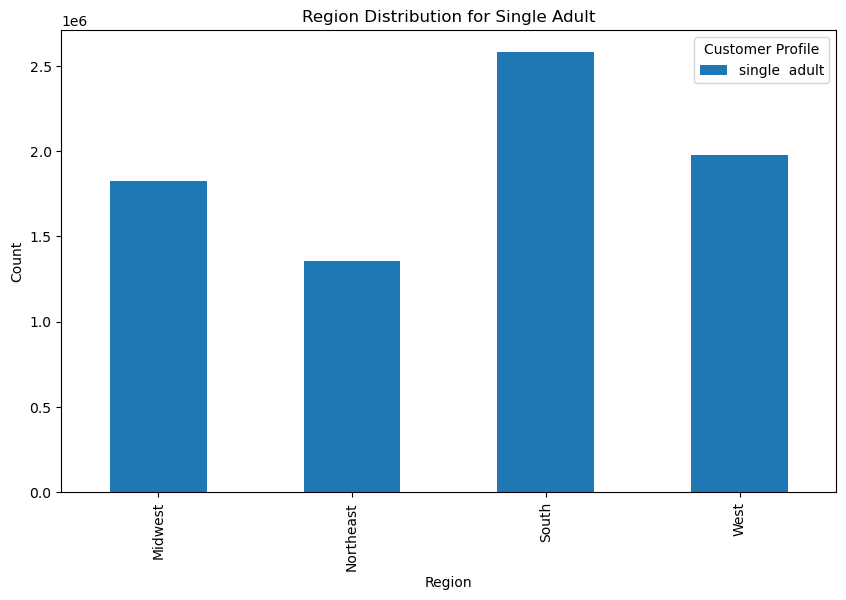

In [103]:
#create bar chart
bar__single_region = df_single_region.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Region Distribution for Single Adult')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Customer Profile', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.show()

In [104]:
#exporting visual
bar__single_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_single_region.png'))

In [105]:
#filter for parent
df_parent = df[df['customer_profile'] == 'parent']

In [106]:
#create crosstab for parent and region
df_parent_region = pd.crosstab(df_parent['customer_profile'], df_parent['region'])

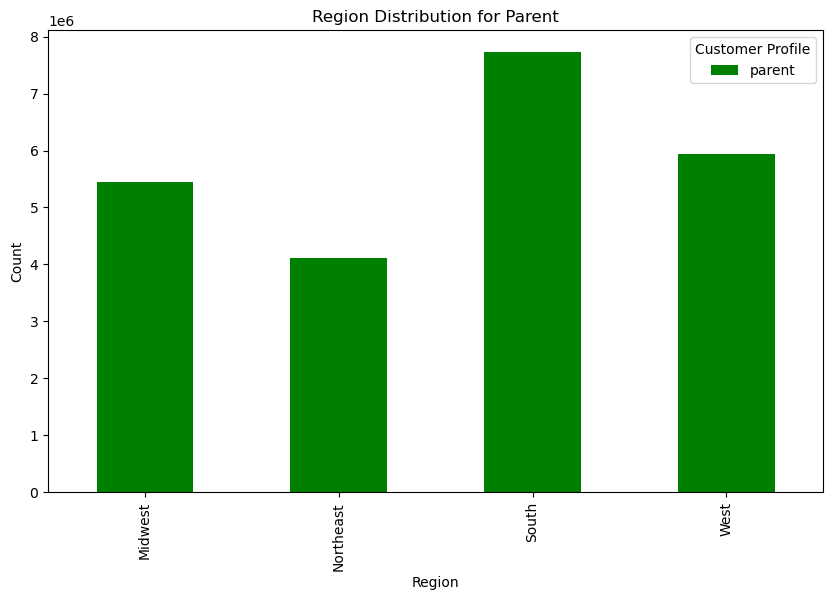

In [138]:
#create bar chart
bar_parent_region = df_parent_region.T.plot(kind='bar', stacked=True, figsize=(10, 6),color= 'green')
plt.title('Region Distribution for Parent')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Customer Profile', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.show()

In [139]:
#exporting visual
bar_parent_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_parent_region.png'))

#### customer profile and departments

In [126]:
#filter for just single adult
df_single_adult = df[df['customer_profile'] == 'single  adult']

In [130]:
#getting top 5 dept id
top5_departments_single_adult = df_single_adult['department_id'].value_counts().nlargest(5)

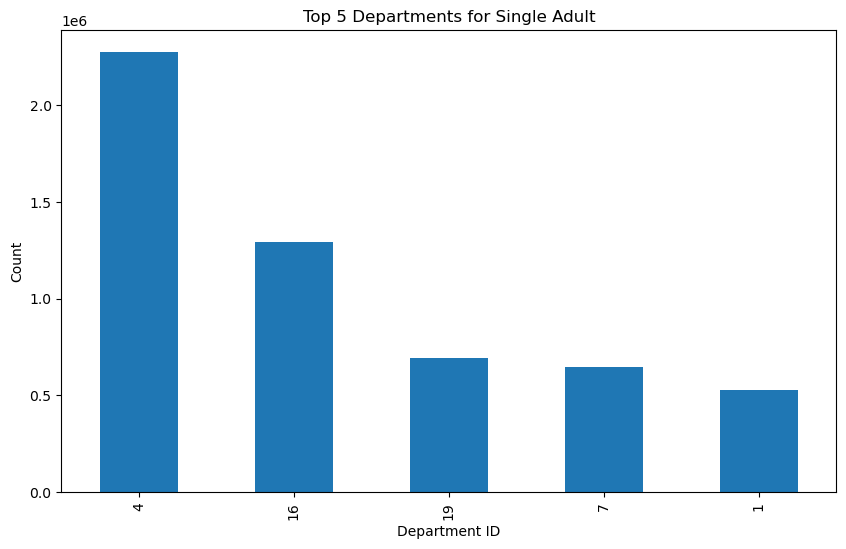

In [131]:
#create bar chart
bar_single_dep = top5_departments_single_adult.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Departments for Single Adult')
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.show()

In [132]:
#exporting visual
bar_single_dep.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_single_dep.png'))

In [133]:
#filter for just parent
df_parent = df[df['customer_profile'] == 'parent']

In [134]:
#getting top 5 dept id
top5_departments_parent = df_parent['department_id'].value_counts().nlargest(5)

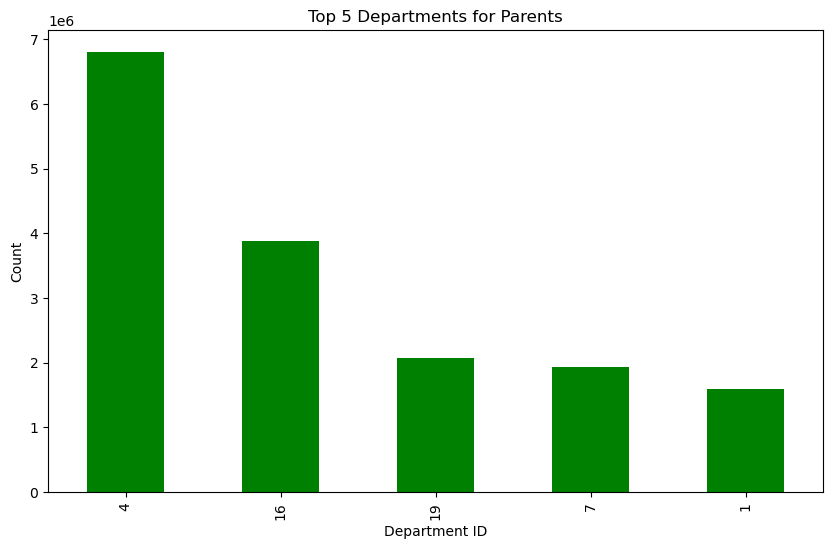

In [136]:
#create bar chart
bar_parent_dep = top5_departments_parent.plot(kind='bar', figsize=(10, 6), color= 'green')
plt.title('Top 5 Departments for Parents')
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.show()

In [137]:
#exporting visual
bar_parent_dep.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_parent_dep.png'))

#### Key question 4: frequency of products order

In [4]:
#dept with highest freq
highest_frequency_department = df['department_id'].value_counts().idxmax()

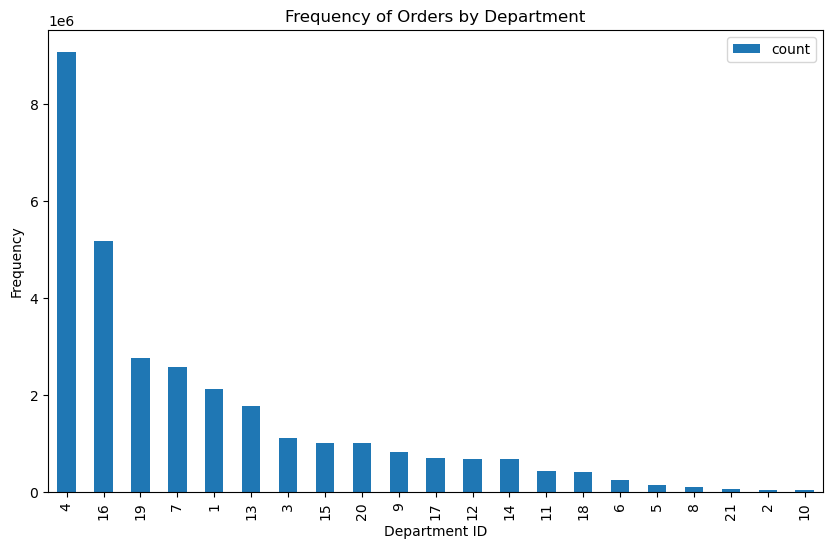

In [10]:
#create bar grapgh 
highest_def = df['department_id'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Orders by Department')
plt.xlabel('Department ID')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [21]:
#exporting visual
highest_def.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_highest_dep.png'))

In [12]:
# filter for dept id 4
df_dept_4 = df[df['department_id'] == 4]

In [15]:
#getting produce name with highest freq
top_10_produce_names = df_dept_4['product_name'].value_counts().nlargest(10).index

In [16]:
#filter for top 10 produce names
df_top_10_produce = df_dept_4[df_dept_4['product_name'].isin(top_10_produce_names)]

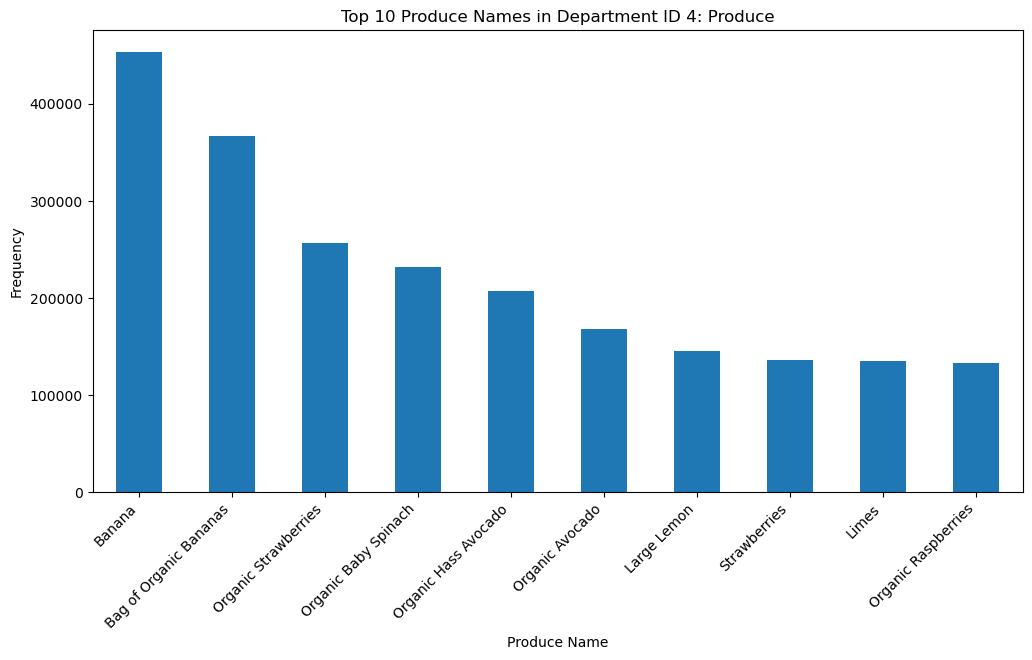

In [19]:
#create graph 
top_produce = df_top_10_produce['product_name'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Produce Names in Department ID 4: Produce')
plt.xlabel('Produce Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [20]:
#exporting visual
top_produce.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_highest_produce.png'))